## <span style="color:lightgreen">By Anmol Gupta</span>

## Importing Libraries & Dataset + Performing Exploratory Data Analysis

In [60]:
import numpy as np # Imports the numpy library
import pandas as pd # Imports the pandas library
import matplotlib.pyplot as plt # Imports the Matplotlib plotting/visualization library
import warnings

import random # Used to randomize selection from an array-like object

from sklearn.preprocessing import LabelEncoder # used to normalize the labels with a value between 0 and n_classes-1, for faster processing
from sklearn.preprocessing import MinMaxScaler # used to transform features by scaling (normalizing) between a given range of values, usually between 0 and 1

from sklearn.model_selection import train_test_split, GridSearchCV # used to split the dataset into test and training datasets
from sklearn.feature_selection import f_classif, SelectKBest

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score # Function used to calculate the accuracy score between predicted values and actual values


# Some additional output formatting settings
pd.options.display.max_columns = 20 
pd.options.display.max_rows = 30
pd.options.display.max_colwidth = 80
np.set_printoptions(precision=4, suppress=True) # Displays only upto 4 decimals

warnings.filterwarnings("ignore")

In [61]:
# Please be wary that the below command will execute only if the dataset is in the same folder as the file, if executing on your local system.
# If executing in Google Colab, you can upload the dataset in the temporary files section
tmnist_data = pd.read_csv('./tmnst DATA SET.csv') # Reading the given TMNIST dataset
tmnist_data.head()

,labels,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,J,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,H,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
tmnist_data.info() # To confirm the existence of null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74724 entries, 0 to 74723
Columns: 785 entries, labels to 784
dtypes: float64(784), object(1)
memory usage: 447.5+ MB


In [63]:
tmnist_data.columns

Index(['labels', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '775', '776', '777', '778', '779', '780', '781', '782', '783', '784'],
      dtype='object', length=785)

In [64]:
# Remove all columns where all values are zero.

dropped_cols = []
for col in tmnist_data.columns[1:]: # Iterating through all columns except the labels column
    if tmnist_data[col].min() == tmnist_data[col].max() == 0:
        tmnist_data.drop(col, axis=1, inplace=True)
        dropped_cols.append(col)
    else:
        continue

print(f'Dropped {len(dropped_cols)} columns')

Dropped 95 columns


In [65]:
tmnist_data.head()

,labels,9,10,11,12,13,14,15,16,17,...,768,769,770,771,772,773,774,775,776,777
0,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,J,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,H,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
tmnist_data.info() # To confirm the existence of null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74724 entries, 0 to 74723
Columns: 690 entries, labels to 777
dtypes: float64(689), object(1)
memory usage: 393.4+ MB


In [67]:
# Describing the labels column of the TMNIST dataset
tmnist_data['labels'].describe()

count     74724
unique       26
top           D
freq       2874
Name: labels, dtype: object

In [68]:
# Creating a list of unique labels from the original dataset
unique_labels = sorted(list(tmnist_data['labels'].unique()))
unique_labels

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [69]:
# Using the LabelEncoder to encode the 25 unique labels (classes) we have, from A-Z to 0-25
le = LabelEncoder()
le.fit(unique_labels)
encoded_labels = le.transform(tmnist_data.iloc[:, 0])
encoded_labels

array([ 3,  5,  9, ..., 13,  9,  8])

In [70]:
# Retrieving the shape of the modified TMNIST dataset to realise the # of rows and columns remaining
tmnist_data.shape

(74724, 690)

#### Normalizing each pixel value from [0,1] range instead of [0,255] usnig the Min-Max Scalar

In [71]:
# Using the min-max scalar to normalize each pixel value
scaler = MinMaxScaler()
model=scaler.fit(tmnist_data.iloc[:,1:]) # Normalizing only the pixel values, not the labels column
norm_tmnist_data=pd.DataFrame(model.transform(tmnist_data.iloc[:,1:]))

In [72]:
norm_tmnist_data

,0,1,2,3,4,5,6,7,8,9,...,679,680,681,682,683,684,685,686,687,688
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
# Re-inserting the "encoded" labels column back into the normalized dataframe object
norm_tmnist_data.insert(0,'labels',encoded_labels)

In [74]:
norm_tmnist_data

,labels,0,1,2,3,4,5,6,7,8,...,679,680,681,682,683,684,685,686,687,688
0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74719,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74720,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74721,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74722,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
## Define X (features) and y (label) variables, based on the normalized dataset
X, y = norm_tmnist_data.iloc[:, 1:].values, norm_tmnist_data.iloc[:, 0].values

## Splitting the data into training and testing with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    stratify=y, # Stratify=y is used to split the training data per class
                                                    random_state=17)

## Problem 1 - 
Neural Network Classifier

We will try the following architectures:
- One hidden layer with 5, 10, 20, 25 neurons
- Two hidden layers with (5, 5), (5, 10), (10, 5), (10, 10) neurons in (layer 1,
layer 2).

In [76]:
# Function to create the Neural Network Classifier using the MLPClassifier model from the sklearn package  
def model_creation(X_train, y_train, hidden_neurons = (5)): # The function call has a default value of (5) for hidden_neurons
    
    # The MLPClassifier object is created with solver = lbfgs (for multi-class classifier), activation function of relu
    # with hidden_layer_sizes as given in the problem

    # Sklearn's MLPClassifier always uses Soft-max Activation on the output layer, hence no changes made for this
    # Source - https://scikit-learn.org/stable/modules/neural_networks_supervised.html#classification  

    mlp = MLPClassifier(hidden_layer_sizes=hidden_neurons,
                        solver='lbfgs',
                        activation='relu', 
                        # solver='adam', 
                        batch_size=500, 
                        shuffle=True)
    
    # Creation of the model with the training features and labels
    mlp.fit(X_train,y_train)
    
    # The model object is returned when this function is called
    return mlp


In [77]:
# Function to test the model and return the test-set accuracy (in addition to the number of parameters of the model) 
def train_and_test(nnModel, X_test, y_test):
    
    # predicted_prob = nnModel.predict_proba(X_test)
    parameters = len(nnModel.get_params())
    # print(nnModel.get_params())
    accuracy = nnModel.score(X_test, y_test)
    # print(predicted_prob, accuracy)
    
    return parameters, accuracy

In [78]:
# Driver function to perform the parameter sweep for various architectures w/ differing number of hidden layers and number of neurons per layer
# This function will store details for each architecture in a list of dicts which will then be returned as a Pandas Dataframe 
def parameter_sweep(X_train, y_train, X_test, y_test):

    final_data_nn = []

    for hidden_neurons in [5, 10, 20, 25]:
        num_hidden = 1
        
        model = model_creation(X_train, y_train, hidden_neurons)
        
        parameters, accuracy = train_and_test(model, X_test, y_test)

        architecture = str(num_hidden) + '-' + '-'.join(str(hidden_neurons).strip('()').split(',')).replace(' ', '') # Creation of the architecture string

        final_data_nn.append({'architecture': architecture, 'parameters': parameters, 'accuracy': accuracy})


    for hidden_neurons in ((5,5), (5,10), (10,5), (10,10)):
        num_hidden = 2
        
        model = model_creation(X_train, y_train, hidden_neurons)
        
        parameters, accuracy = train_and_test(model, X_test, y_test)

        architecture = str(num_hidden) + '-' + '-'.join(str(hidden_neurons).strip('()').split(',')).replace(' ', '') # Creation of the architecture string

        final_data_nn.append({'architecture': architecture, 'parameters': parameters, 'accuracy': accuracy})

    return pd.DataFrame(final_data_nn)


In [79]:
# parameter_sweep function is called with the relevant training & testing data passed as arguments, the final results of each architecture being returned as a DataFrame
final_table_nn = parameter_sweep(X_train, y_train, X_test, y_test)

final_table_nn.to_csv('NN_Output.csv')
final_table_nn

,architecture,parameters,accuracy
0,1-5,23,0.769159
1,1-10,23,0.931796
2,1-20,23,0.948657
3,1-25,23,0.946962
4,2-5-5,23,0.560978
5,2-5-10,23,0.848158
6,2-10-5,23,0.876126
7,2-10-10,23,0.909626


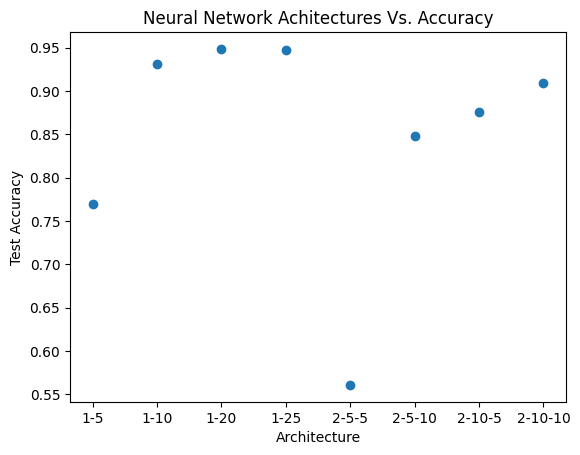

In [80]:
# Scatter Plot of type of architecture to test-accuracy 
plt.scatter(x=final_table_nn['architecture'],y=final_table_nn['accuracy'])
plt.title('Neural Network Achitectures Vs. Accuracy')
plt.xlabel('Architecture')
plt.ylabel('Test Accuracy')
plt.show()

### Final Summary - 

- The Neural Network Classifier was created for varying number of neurons in the hidden_layer (either 1 or 2) using the Sklearn module's MLPClassifier model

- The Neural network(s) created were created with the 'lbfgs' solver (for multi-class classifier), 'RELU' activation function for the hidden layers and a batch size of 500. In addition, all MLPClassifiers use soft-max activation function for the output layer, as given in the problem

- While plotting the Test Accuracies for all Neural Network Architectures, for the 1-hidden layer achitecture Neural Networks, the Neural Network with 20 neurons provides the highest accuracy with 94.77%. However, for the neural network with 25 neurons, the Accuracy drops slightly to 94.67%. This means that using more than 20 neurons in 1 hidden layer, is leading to overfitting.

- For the architectures with 2-hidden layers, the accuracy shows an increasing trend as we increase the number of neurons in the 2 layers, with 10 neurons in both layers giving an accuracy of 93.1% which is very close to the best performing 1-hidden layer architecture model

## Problem 2 - 
SVM Classifier

Write an svm_explore(train_data, test_data, c1, c2) function that takes any two classes (c1, c2) out of 26 and does the following - 

- Builds the Linear SVM classifiers with C = 5 to 50 in increments of 5
    - We will call these Linear/C=5, …, Linear/C=50

- Builds Polynomial SVM classifier with d = 2, d = 3, d = 4, d = 5 and C=10
    - We will call these Poly/d=2, Poly/d=5 (keep c = 1 in these cases)

- Builds the RBF classifier with sigma = 2 to 10 in increments of 2
    - We will call these RBF/sigma=2, RBF/sigma=4, …

In [81]:
# Using the random.sample function to randomly sample 2 values from the total unique labels in the TMNIST dataset
classes = (random.sample(unique_labels,2))
classes

['M', 'L']

In [82]:
# Transforming the classes chosen randomly using the same Label Encoder, used during the Pre-processing of the dataset
transformed_classes = le.transform(classes)
transformed_classes

array([12, 11])

In [83]:
# Filtering the datafarme based on the classes selected at random
filtered_data_svm = norm_tmnist_data[norm_tmnist_data['labels'].isin(transformed_classes)].reset_index(drop=True) # Filtering the original dataset based on the 2 classes selected, and creating a new dataframe object for the SVM problem
filtered_data_svm

,labels,0,1,2,3,4,5,6,7,8,...,679,680,681,682,683,684,685,686,687,688
0,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5743,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5744,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5745,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5746,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
## Define X (features) and y (label) variables, based on the normalized AND filtered dataset
X, y = filtered_data_svm.iloc[:, 1:].values, filtered_data_svm.iloc[:, 0].values

## Splitting the data into training and testing with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    stratify=y,
                                                    random_state=17)

In [85]:
# Driver function to perform the parameter sweep for various types of SVM Classifiers and differing values of hyperparams for each.
# This function will store details for each type of SVM Classifier created in a list of dicts which will then be returned as a Pandas Dataframe.

def svm_explore(train_data, test_data, c1, c2):
    final_data_svm = []
    for classifier in ['Linear', 'Poly', 'RBF']:
        if classifier == 'Linear':
            for reg in range(5,51,5):
    
                # Creating a Linear Support Vector Classifier with various values of the regularization params
                svm_lin = SVC(kernel='linear', C=reg, random_state=17)

                # Train the classifier
                svm_lin.fit(train_data[0], train_data[1])

                # Calculate the number of support vectors
                support_vecs_lin = svm_lin.n_support_

                # Make predictions on the train set
                y_train_pred = svm_lin.predict(train_data[0])

                # Make predictions on the test set
                y_pred = svm_lin.predict(test_data[0])
                

                # Evaluate the model
                train_accuracy = accuracy_score(train_data[1], y_train_pred)
                test_accuracy = accuracy_score(test_data[1], y_pred)
                
                # Return the testing/train accuracy
                final_data_svm.append([f'{classifier}/C={reg}', support_vecs_lin, train_accuracy, test_accuracy])
        
        elif classifier == 'Poly':
            for deg in [2, 3, 4, 5, 10]:
    
                # Creating a Poly Support Vector Classifier with various values of the degree of the polynomial function (which will dictate the decision boundary) plus a constant value of 1 for the regularization param
                svm_poly = SVC(kernel='poly', C=1, degree=deg, random_state=17)

                # Train the classifier
                svm_poly.fit(train_data[0], train_data[1])

                # Calculate the number of support vectors
                support_vecs_poly = svm_poly.n_support_

                # Make predictions on the train set
                y_train_pred = svm_poly.predict(train_data[0])

                # Make predictions on the test set
                y_pred = svm_poly.predict(test_data[0])

                # Evaluate the model
                train_accuracy = accuracy_score(train_data[1], y_train_pred)
                test_accuracy = accuracy_score(test_data[1], y_pred)
                
                # Return the testing/train accuracy
                final_data_svm.append([f'{classifier}/d={deg}', support_vecs_poly, train_accuracy, test_accuracy])
        else:
            for g in range(2,11,2):
    
                # Creating a Support Vector Classifier
                svm_rbf = SVC(kernel='rbf', gamma=1/g, random_state=17) # Since the SVC function from the Sklearn Package uses gamma instead of sigma, we put gamma as (1/value of sigma)
                # More information about gamma - https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
                # More information about sigma - https://towardsdatascience.com/support-vector-machines-under-the-hood-c609e57a4b09#:~:text=the%20decision%20boundary.-,RBF%20kernel,boundary%20is%20highly%20non%2Dlinear.

                # Train the classifier
                svm_rbf.fit(train_data[0], train_data[1])

                # Calculate the number of support vectors
                support_vecs_rbf = svm_rbf.n_support_

                # Make predictions on the train set
                y_train_pred = svm_rbf.predict(train_data[0])

                # Make predictions on the test set
                y_pred = svm_rbf.predict(test_data[0])

                # Evaluate the model
                train_accuracy = accuracy_score(train_data[1], y_train_pred)
                test_accuracy = accuracy_score(test_data[1], y_pred)
                
                # Return the testing/train accuracy
                final_data_svm.append([f'{classifier}/sigma={g}', support_vecs_rbf, train_accuracy, test_accuracy])
    
    return pd.DataFrame(final_data_svm, columns=['classifier', 'num_support_vectors', 'train_accuracy', 'test_accuracy'])

In [86]:
# Calling the svm_explore function created and which will return a dataframe of all the combinations of the different SVM classifiers with the 
# different Regularization parameter values, along with the Train/Test accuracies

final_table_svm = svm_explore((X_train, y_train), (X_test, y_test), transformed_classes[0], transformed_classes[1])

final_table_svm.to_csv('SVM_Explore_Output.csv')
final_table_svm

,classifier,num_support_vectors,train_accuracy,test_accuracy
0,Linear/C=5,"[34, 70]",1.000000,0.994203
1,Linear/C=10,"[34, 70]",1.000000,0.994203
2,Linear/C=15,"[34, 70]",1.000000,0.994203
3,Linear/C=20,"[34, 70]",1.000000,0.994203
4,Linear/C=25,"[34, 70]",1.000000,0.994203
5,Linear/C=30,"[34, 70]",1.000000,0.994203
6,Linear/C=35,"[34, 70]",1.000000,0.994203
7,Linear/C=40,"[34, 70]",1.000000,0.994203
8,Linear/C=45,"[34, 70]",1.000000,0.994203
9,Linear/C=50,"[34, 70]",1.000000,0.994203


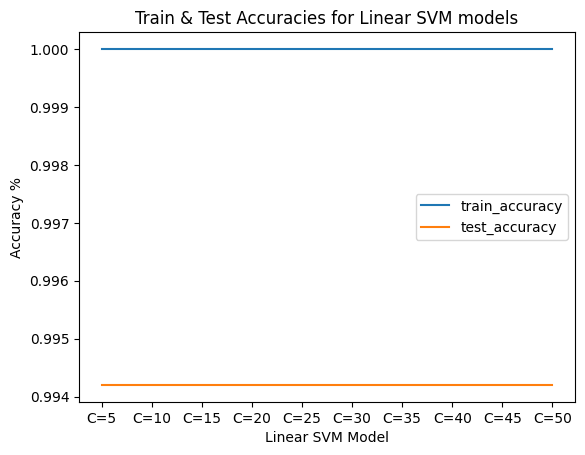

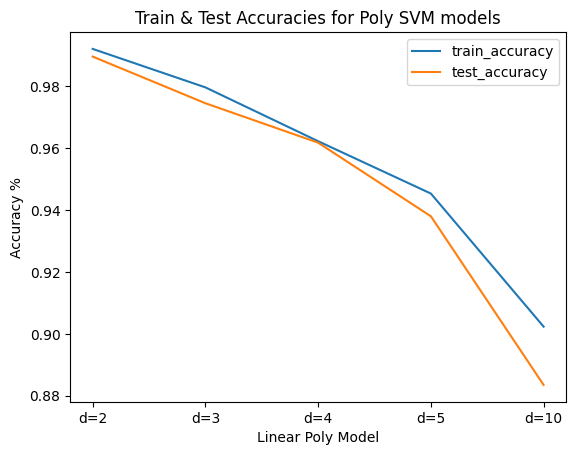

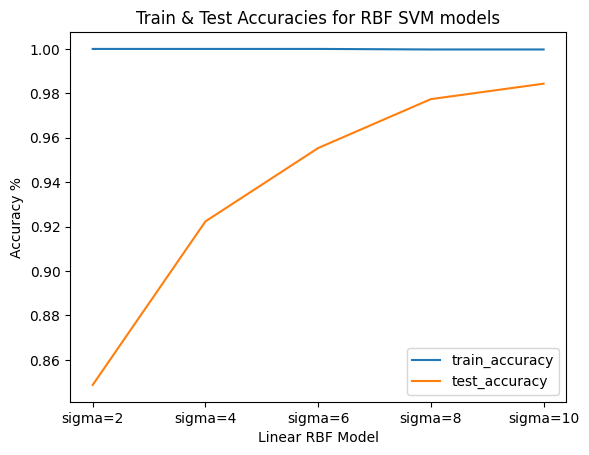

In [87]:
# Plotting graphs for each type of SVM Classifier created vs. their respective train/test accuracies

svm_linear_results = final_table_svm[final_table_svm['classifier'].str.contains('Linear')]
svm_linear_results[['classifier_name', 'complexity_parameters']] = svm_linear_results['classifier'].str.split('/', n=1, expand=True)
plt.plot(svm_linear_results['complexity_parameters'], svm_linear_results[['train_accuracy', 'test_accuracy']])
plt.title('Train & Test Accuracies for Linear SVM models')
plt.xlabel('Linear SVM Model')
plt.ylabel('Accuracy %')
plt.legend(['train_accuracy', 'test_accuracy'])
plt.show()

svm_poly_results = final_table_svm[final_table_svm['classifier'].str.contains('Poly')]
svm_poly_results[['classifier_name', 'complexity_parameters']] = svm_poly_results['classifier'].str.split('/', n=1, expand=True)
plt.plot(svm_poly_results['complexity_parameters'], svm_poly_results[['train_accuracy', 'test_accuracy']])
plt.title('Train & Test Accuracies for Poly SVM models')
plt.xlabel('Linear Poly Model')
plt.ylabel('Accuracy %')
plt.legend(['train_accuracy', 'test_accuracy'])
plt.show()

svm_rbf_results = final_table_svm[final_table_svm['classifier'].str.contains('RBF')]
svm_rbf_results[['classifier_name', 'complexity_parameters']] = svm_rbf_results['classifier'].str.split('/', n=1, expand=True)
plt.plot(svm_rbf_results['complexity_parameters'], svm_rbf_results[['train_accuracy', 'test_accuracy']])
plt.title('Train & Test Accuracies for RBF SVM models')
plt.xlabel('Linear RBF Model')
plt.ylabel('Accuracy %')
plt.legend(['train_accuracy', 'test_accuracy'])
plt.show()

In [88]:
final_table_svm

,classifier,num_support_vectors,train_accuracy,test_accuracy
0,Linear/C=5,"[34, 70]",1.000000,0.994203
1,Linear/C=10,"[34, 70]",1.000000,0.994203
2,Linear/C=15,"[34, 70]",1.000000,0.994203
3,Linear/C=20,"[34, 70]",1.000000,0.994203
4,Linear/C=25,"[34, 70]",1.000000,0.994203
5,Linear/C=30,"[34, 70]",1.000000,0.994203
6,Linear/C=35,"[34, 70]",1.000000,0.994203
7,Linear/C=40,"[34, 70]",1.000000,0.994203
8,Linear/C=45,"[34, 70]",1.000000,0.994203
9,Linear/C=50,"[34, 70]",1.000000,0.994203


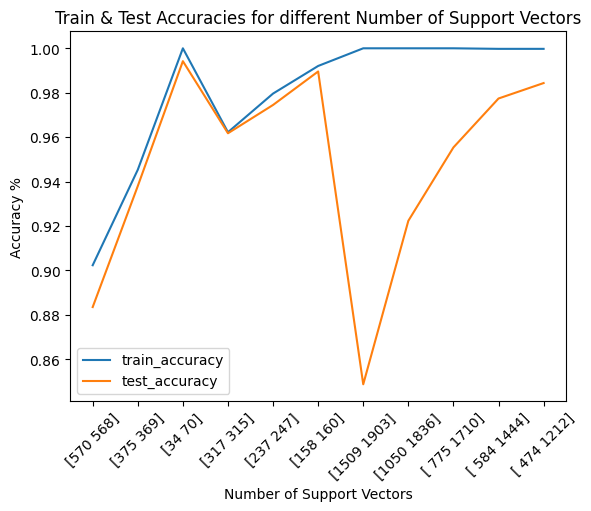

In [89]:
# Plot 4 - grouping by number of support vectors and plotting for train/test accuracies

final_table_svm['num_support_vectors'] = final_table_svm['num_support_vectors'].astype('str')

svm_results = final_table_svm.groupby(by=['num_support_vectors'])[['train_accuracy','test_accuracy']].mean()

plt.plot(svm_results.index[::-1], svm_results[['train_accuracy', 'test_accuracy']][::-1])
plt.title('Train & Test Accuracies for different Number of Support Vectors')
plt.xlabel('Number of Support Vectors')
plt.ylabel('Accuracy %')
plt.xticks(rotation=45)
plt.legend(['train_accuracy', 'test_accuracy'])
plt.show()

### Final Summary - 

- The SVM Classifiers were created using the Sklearn package's SVC (Support Vector Classifier) Model.

- For the Linear SVC models, there is no significant change observable, for varying values of the regularization parameter, with the training accuracy at 100% and the testing accuracy at 99.4%. In addition, the number of support vectors for all the different values of the regularization parameter is the same, which explains the consistent train/test accuracy scores.

- For the Poly SVC models, both the training and testing accuracy scores are decreasing with a decreasing value of the 'degree' parameter. i.e., with a higher degree polynomial function representing the decision boundary, the model's performance is worsening.

- For the RBF SVC models, the training accuracy remains consistent at 100%. However, with an increasing value of sigma (i.e., a decreasing value of gamma), the testing accuracy scores are increasing. With a higher value of sigma (lower value of gamma), the decision boundary becomes much more smoother leading to less number of support vectors and lower overfitting.

- For the number of support vectors - with a higher number of support vectors, the training and testing accuracy both are increasing. However, this trend is noticed only till a certain point. After this, the decision boundary becomes too complex and leads to overfitting of the model, leading to a plateau in the training accuracy scores but a decline in the testing accuracy scores.

## Problem 3 - 

Random Forest

In [90]:
# Working on the same filtered dataset for the 2 random classes chosen for the SVM classifier(s)

filtered_data_rf = filtered_data_svm.copy(deep=True)

In [91]:
## Define X (features) and y (label) variables, based on the normalized AND filtered dataset
X, y = filtered_data_rf.iloc[:, 1:].values, filtered_data_rf.iloc[:, 0].values

## Splitting the data into training and testing with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    stratify=y,
                                                    random_state=17)

In [92]:
# Driver function to perform the parameter sweep for various values of 'number of trees' and 'max depth' hyperparameters for the Random Forest Model
# This function will store details for each combination of num_trees and max_depth of Random Forest Classifier, created as a 2-D listwhich will then be returned as a Pandas Dataframe.

def random_forrest_explore(train_data, test_data, c1, c2):
    final_data_rf = []
    for num_trees in range(5,101,5):
        for depth in range(3,11,1):
    
            # Creating a Random Forest Classifier with varying values of the number of trees and max depth hyperparams
            rfc = RandomForestClassifier(n_estimators=num_trees, random_state=17, max_depth = depth)

            # Train the classifier
            rfc.fit(train_data[0], train_data[1])

            # Make predictions on the train set
            y_train_pred = rfc.predict(train_data[0])

            # Make predictions on the test set
            y_pred = rfc.predict(test_data[0])

            # Evaluate the model
            train_accuracy = accuracy_score(train_data[1], y_train_pred)
            test_accuracy = accuracy_score(test_data[1], y_pred)
            
            # Return the testing/train accuracy
            final_data_rf.append([num_trees, depth, train_accuracy, test_accuracy])
    
    return pd.DataFrame(final_data_rf, columns=['num_of_trees', 'max_depth', 'train_accuracy', 'test_accuracy'])

In [93]:
# Calling the Random_forrest_explore function created and which will return a dataframe of all the combinations of number of trees and max_depth 
# hyperparameters, along with the Train/Test accuracies

final_table_rf = random_forrest_explore((X_train, y_train), (X_test, y_test), transformed_classes[0], transformed_classes[1])

              train_accuracy  test_accuracy
num_of_trees                               
5                   0.996396       0.993261
10                  0.996986       0.994058
15                  0.997390       0.994058
20                  0.997235       0.994638
25                  0.997048       0.994710
30                  0.996955       0.995145
35                  0.997110       0.995507
40                  0.996862       0.995435
45                  0.996955       0.995507
50                  0.996955       0.995580
55                  0.996986       0.995290
60                  0.997017       0.995507
65                  0.997048       0.995725
70                  0.996893       0.995507
75                  0.996769       0.995290
80                  0.996893       0.995580
85                  0.996924       0.995797
90                  0.996893       0.995507
95                  0.996769       0.995507
100                 0.996800       0.995797


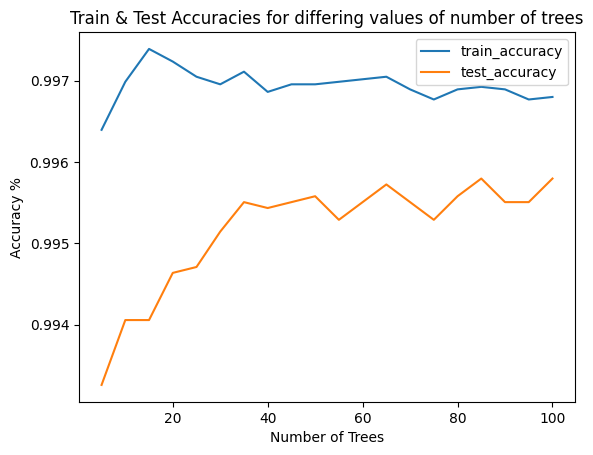

In [94]:
# Plot 1
# Grouping by number of trees, averaging the training/testing accuracy scores in the process
rf_plot1_data = final_table_rf.groupby(by=['num_of_trees'])[['train_accuracy','test_accuracy']].mean()

print(rf_plot1_data)

plt.plot(rf_plot1_data.index, rf_plot1_data[['train_accuracy', 'test_accuracy']])
plt.title('Train & Test Accuracies for differing values of number of trees')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy %')
plt.legend(['train_accuracy', 'test_accuracy'])
plt.show()

           train_accuracy  test_accuracy
max_depth                               
3                0.988802       0.990377
4                0.992754       0.993449
5                0.995501       0.994812
6                0.998894       0.996435
7                0.999826       0.996638
8                0.999913       0.996812
9                0.999938       0.996464
10               0.999925       0.996377


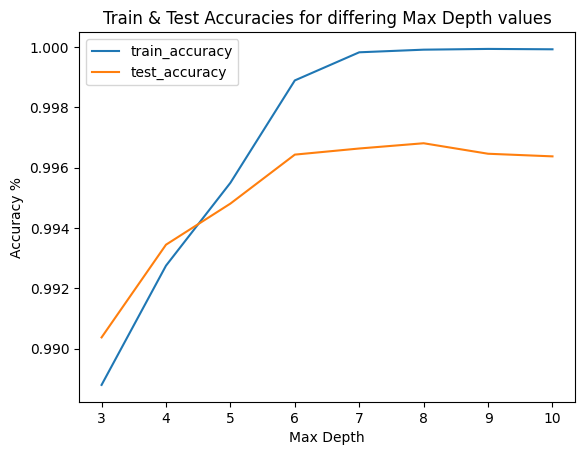

In [95]:
# Plot 2
# Grouping by max_depth values, averaging the training/testing accuracy scores in the process
rf_plot2_data = final_table_rf.groupby(by=['max_depth'])[['train_accuracy','test_accuracy']].mean()

print(rf_plot2_data)

plt.plot(rf_plot2_data.index, rf_plot2_data[['train_accuracy', 'test_accuracy']])
plt.title('Train & Test Accuracies for differing Max Depth values')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy %')
plt.legend(['train_accuracy', 'test_accuracy'])
plt.show()

### Final Summary - 

- The Random Forest Classifiers were created using the Sklearn package's RandomForestClassifier Model.

- For the RandomForestClassifier, as the number of trees increase, there is a noticeable increase in both, train and test accuracy scores. However, this increase is not linearly increasing. The best accuracy is observed for the RandomForestClassifier with number of trees = 85 (and same for # of trees = 100). However, with higher number of trees, the computational effort also increases.

- For the RandomForestClassifier, as the max_depth increases, we can see the training/ testing accuracy scores increases, although not linearly. In addition, the testing accuracy was greater than the training accuracy for very low max_depth values, which can indicate underfitting. 

- The best accuracy is observed for the RandomForestClassifier with max_depth = 8

- For generalization, the number of trees should be large enough that classification can happen with good accuracy but should not be computationally very intensive. The maximum depth should be large enough to prevent underfitting but small enough to prevent overfitting.

## Problem 4 - 

Pair-wise Classifier

Build a Linear SVM with a reasonable C value on this 30-dimensional data

In [96]:
# Creating a helper function to create pairwise classifiers on the basis of the top 30 Fisher Dimensions 
# and subsequently creating a Linear SVM Classifier for each of these pairs
def pairwise_classifier(norm_tmnist_data):
    final_data_pwc = []
    
    unique_labels = sorted(list(norm_tmnist_data['labels'].unique())) # Sorted list of Unique Labels which will be iterated through to find pairs of classes

    for f_class in unique_labels:
        for s_class in unique_labels:
            if f_class == s_class: # Skipping same class combinations
                break
            
            else:
                print(f'For Classes - {f_class}, {s_class}')
                # Filtering the dataset based on the selected label(s)
                filtered_df = norm_tmnist_data[norm_tmnist_data['labels'].isin([f_class,s_class])]
                
                filtered_X, filtered_y = filtered_df.iloc[:, 1:], filtered_df.iloc[:, 0]
                # print(filtered_X, filtered_y)
                
                # Selecting the best (top) 30 dimensions based on F-score
                selector = SelectKBest(score_func=f_classif, k=30)
                X_top30 = selector.fit_transform(filtered_X, filtered_y)
                top30_features = selector.get_feature_names_out(input_features=None)
                
                print(f'Top 30 Dimensions based on F-statistic- {top30_features}')

                # Splitting the data into training and testing with a 70:30 ratio
                X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_top30, 
                                                    y, 
                                                    test_size=0.3, 
                                                    stratify=y,
                                                    random_state=17)
                
                
                # Now that we have our training and testing dataset prepared for the top 30 Fisher Dimensions,
                # we will develop a Linear SVC Model
                svm_lin = SVC(kernel='linear', max_iter=100)

                # We will be using GridSearchCV to determine the best C (regularization) parameter value, 
                # for a pair of classes and the top 30 Fisher Dimensions for them
                
                # Defining the hyperparameter grid
                param_grid = {
                    'C': range(5,101,5),
                }

                # Creating the GridSearchCV object
                grid_search = GridSearchCV(estimator=svm_lin, param_grid=param_grid,
                                        cv=5, scoring='accuracy', n_jobs=-1)

                # Fitting the grid search to the data
                grid_search.fit(X_train_filtered, y_train_filtered)

                # Getting the best parameters after the hyperparameter sweep
                best_params = grid_search.best_params_
                # print("Best Parameters:", best_params)

                # Creating a Linear Support Vector Classifier w/ the best value of the regularization parameter
                svm_lin = SVC(**best_params, kernel='linear', random_state=17)

                # Training the Support Vector Classifier
                svm_lin.fit(X_train_filtered, y_train_filtered)

                # Making predictions on the test set
                y_pred = svm_lin.predict(X_test_filtered)
                
                # Evaluating the model
                validation_set_accuracy = accuracy_score(y_test_filtered, y_pred)
                
                # Adding a new list to the final_data_pwc array, which will store the classes and the 
                # respective validation set accuracy for the Support Vector Classifier Model developed
                final_data_pwc.append([f_class, s_class, validation_set_accuracy])

    # Creating & Returning a dataframe from the 2-D list containing the validation set accuracy for each pair of classes
    return pd.DataFrame(final_data_pwc, columns=['Class-1', 'Class-2', 'Validation-Set_Accuracy'])

In [97]:
# Calling the function defined above to create pairwise classifiers on the basis of their top 30 Fisher Dimensions 
# and subsequently creating a Linear SVM Classifier for each of these pairs
final_table_pwc = pairwise_classifier(norm_tmnist_data)

For Classes - 1, 0
Top 30 Dimensions based on F-statistic- ['x105' 'x106' 'x107' 'x131' 'x132' 'x141' 'x157' 'x158' 'x167' 'x168'
 'x183' 'x194' 'x216' 'x220' 'x242' 'x246' 'x317' 'x318' 'x560' 'x561'
 'x562' 'x585' 'x586' 'x587' 'x588' 'x589' 'x590' 'x591' 'x592' 'x593']


For Classes - 2, 0
Top 30 Dimensions based on F-statistic- ['x216' 'x242' 'x243' 'x268' 'x269' 'x295' 'x296' 'x321' 'x322' 'x347'
 'x348' 'x374' 'x375' 'x400' 'x401' 'x402' 'x403' 'x428' 'x429' 'x430'
 'x457' 'x533' 'x561' 'x562' 'x563' 'x589' 'x590' 'x591' 'x592' 'x593']
For Classes - 2, 1
Top 30 Dimensions based on F-statistic- ['x105' 'x106' 'x107' 'x270' 'x271' 'x295' 'x296' 'x297' 'x317' 'x318'
 'x319' 'x320' 'x321' 'x322' 'x344' 'x345' 'x346' 'x347' 'x348' 'x349'
 'x374' 'x375' 'x376' 'x377' 'x403' 'x404' 'x430' 'x431' 'x585' 'x586']
For Classes - 3, 0
Top 30 Dimensions based on F-statistic- ['x105' 'x106' 'x131' 'x132' 'x157' 'x167' 'x183' 'x194' 'x209' 'x216'
 'x220' 'x221' 'x242' 'x247' 'x268' 'x269' 'x273' 'x295' 'x299' 'x321'
 'x325' 'x347' 'x401' 'x586' 'x587' 'x588' 'x589' 'x590' 'x591' 'x592']
For Classes - 3, 1
Top 30 Dimensions based on F-statistic- ['x274' 'x293' 'x294' 'x295' 'x296' 'x299' 'x300' 'x315' 'x316' 'x317'
 'x318' 'x319' 'x320' 'x321' 'x322' 'x325' 'x326' '

In [98]:
# Transforming the encoded labels back to their original values (i.e., Alphabets)
final_table_pwc['Class-1'] = le.inverse_transform(final_table_pwc['Class-1'])
final_table_pwc['Class-2'] = le.inverse_transform(final_table_pwc['Class-2'])

final_table_pwc.to_csv('Pairwise_Classifier_output.csv')

final_table_pwc

,Class-1,Class-2,Validation-Set_Accuracy
0,B,A,0.491014
1,C,A,0.508406
2,C,B,0.493333
3,D,A,0.507826
4,D,B,0.515362
...,...,...,...
320,Z,U,0.516522
321,Z,V,0.493913
322,Z,W,0.485797
323,Z,X,0.488116


### Final Summary - 

- To obtain the Top 30 Fisher dimensions for each pair of classes, the f_classif and SelectKBest functions from Sklearn's feature selection library were used.

- The f_classif function computes ANOVA F-values. While they are different in formulation, they share a conceptual similarity, which is why the ANOVA F-value is often used as an approximation for the Fisher Score in feature selection. Since they both rely on the ratio of between-class variance to within-class variance, the ANOVA F-value serves as a good approximation for the Fisher Score in feature selection tasks.

- Theoretically, this does make more sense to differentiate the 'difficult' vs 'easy' pairs to classify as alphabets which are similar in shape will occupy roughly the same pixels on the image. However, practically, this is proven to not be true as the number of Fisher Dimensions that we have considered for the SVM Classifier is very less (30 out of 690 features in the prepared dataset).

- For alphabets which look similar, the top 30 features chosen are similar (or almost similar) for those pairs of alphabets which are similar, as they occupy almost the same pixels on the image. However, since shapes of different alphabets occupy different pixels, most of the pairs do not exhibit high overlapping top 30 features (or dimensions).